In [57]:
%matplotlib inline
import random
import sys
import numpy as np
import pandas as pd
from prettytable import PrettyTable
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

In [58]:
df=pd.read_csv('heart_disease.csv')
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [59]:
df=df.dropna()
X=df.drop(columns=['TenYearCHD'])
y=df['TenYearCHD']

In [60]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.3,random_state=42)

In [61]:
score_list,mse_list=[],[]
for d in range(5):
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    
    scaler = StandardScaler()
    X_train_poly_scaled = scaler.fit_transform(X_train_poly)
    X_val_poly_scaled = scaler.fit_transform(X_val_poly)
    lr = LogisticRegression(max_iter=10000)
    lr.fit(X_train_poly_scaled, y_train)
    val_score = lr.score(X_val_poly_scaled, y_val)
    score_list.append(val_score)
    y_pred=lr.predict(X_val_poly_scaled)
    MSE=mean_squared_error(y_pred,y_val)
    mse_list.append(MSE)

In [62]:
print(f'Validation Scores: {score_list}')

Validation Scores: [0.8413855970829535, 0.8486782133090246, 0.8286235186873291, 0.8258887876025525, 0.8040109389243391]


In [63]:
print(f'MSE Scores: {mse_list}')

MSE Scores: [0.15861440291704648, 0.15132178669097537, 0.17137648131267091, 0.1741112123974476, 0.1959890610756609]


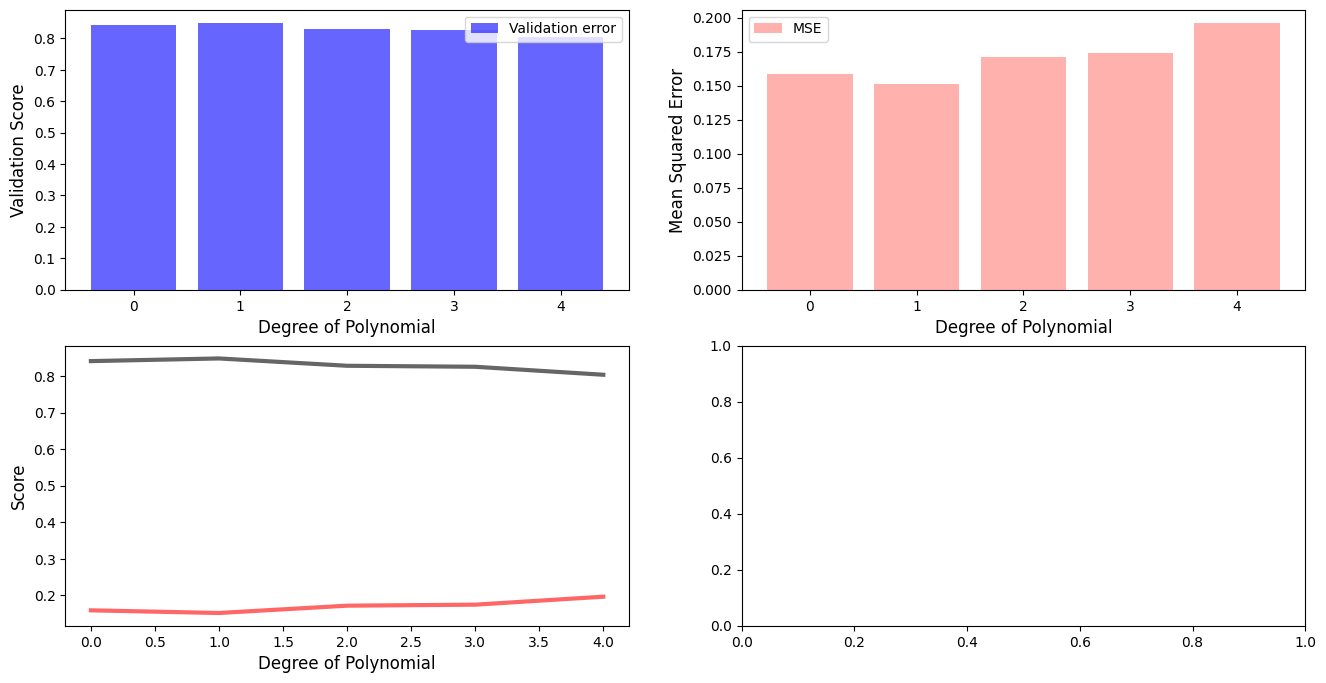

In [77]:
fig, ax = plt.subplots(2,2, figsize=(16,8))

ax[0][0].bar(range(d+1), score_list, label = 'Validation error', linewidth=3, color='blue', alpha=0.6)


ax[0][1].bar(range(d+1), mse_list, label = 'MSE', linewidth=3, color='#FF7E79', alpha=0.6)

ax[1][0].plot(range(d+1),mse_list,label='MSE', linewidth=3, color='red', alpha=0.6)
ax[1][0].plot(range(d+1),score_list, label='ValErr',linewidth=3,color='black',alpha=0.6)

ax[0][0].set_xlabel('Degree of Polynomial', fontsize=12)
ax[0][0].set_ylabel('Validation Score', fontsize=12)

ax[0][1].set_xlabel('Degree of Polynomial', fontsize=12)
ax[0][1].set_ylabel('Mean Squared Error', fontsize=12)

ax[1][0].set_xlabel('Degree of Polynomial',fontsize=12)
ax[1][0].set_ylabel('Score',fontsize=12)
ax[0][0].legend()
ax[0][1].legend()
plt.show();

In [65]:
###LOWEST MSE AND HIGHEST VAL SCORE GIVES US THE BEST DEGREE -WHICH IS 1- FOR THE MODEL

In [78]:
def test_random_patient(df, poly, scaler, model):

    random_patient = df.sample(n=1, random_state=random.randint(0, 10000))

    table = PrettyTable()
    table.field_names = random_patient.columns.tolist()
    table.add_row(random_patient.iloc[0].tolist())

    print("Random Patient Data:\n", table)


    X_random = random_patient.drop(columns=['TenYearCHD'])
    X_random_poly = poly.fit_transform(X_random)
    X_random_poly_scaled = scaler.fit_transform(X_random_poly)

    prediction = model.predict(X_random_poly_scaled)
    prediction_prob = model.predict_proba(X_random_poly_scaled)

    print(f"Predicted Class: {prediction[0]}")
    print(f"Predicted Probability: {prediction_prob[0]}")

In [79]:
test_random_patient(df,poly,scaler,lr)

Random Patient Data:
 +------+------+-----------+---------------+------------+--------+-----------------+--------------+----------+---------+-------+-------+-------+-----------+---------+------------+
| male | age  | education | currentSmoker | cigsPerDay | BPMeds | prevalentStroke | prevalentHyp | diabetes | totChol | sysBP | diaBP |  BMI  | heartRate | glucose | TenYearCHD |
+------+------+-----------+---------------+------------+--------+-----------------+--------------+----------+---------+-------+-------+-------+-----------+---------+------------+
| 0.0  | 49.0 |    2.0    |      1.0      |    30.0    |  0.0   |       0.0       |     0.0      |   0.0    |  265.0  | 144.0 |  86.0 | 25.57 |    82.0   |   68.0  |    0.0     |
+------+------+-----------+---------------+------------+--------+-----------------+--------------+----------+---------+-------+-------+-------+-----------+---------+------------+
Predicted Class: 0
Predicted Probability: [0.91639402 0.08360598]
